<!-- TOC -->

- [6.Linear Model Selection and Regularization](#6linear-model-selection-and-regularization)
    - [6.1 Subset Selection](#61-subset-selection)
        - [6.1.1 Best Subset Selection](#611-best-subset-selection)
        - [6.1.2 Stepwise Selection](#612-stepwise-selection)
        - [6.1.3 Choosing the Optimal Model](#613-choosing-the-optimal-model)
            - [Cp, AIC, BIC, and Adjusted R2](#cp-aic-bic-and-adjusted-r2)
            - [Validation and Cross-Validation](#validation-and-cross-validation)
    - [6.2 Shrinkage Methods](#62-shrinkage-methods)
        - [6.2.1 Ridge Regression](#621-ridge-regression)
            - [Why Does Ridge Regression Improve Over Least Squares?](#why-does-ridge-regression-improve-over-least-squares)
        - [6.2.2 The Lasso](#622-the-lasso)
    - [6.3 Dimension Reduction Methods](#63-dimension-reduction-methods)
    - [6.4 Considerations in High Dimensions](#64-considerations-in-high-dimensions)
        - [6.4.1 High-Dimensional Data](#641-high-dimensional-data)
        - [6.4.2 What Goes Wrong in High Dimensions?](#642-what-goes-wrong-in-high-dimensions)
    - [6.5 Lab 1: Subset Selection Methods](#65-lab-1-subset-selection-methods)
        - [6.5.1 Best Subset Selection](#651-best-subset-selection)
        - [6.5.2 Forward and Backward Stepwise Selection](#652-forward-and-backward-stepwise-selection)
        - [6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation](#653-choosing-among-models-using-the-validation-set-approach-and-cross-validation)
    - [6.6 Lab 2: Ridge Regression and the Lasso](#66-lab-2-ridge-regression-and-the-lasso)
        - [6.6.1 Ridge Regression](#661-ridge-regression)
        - [6.6.2 The Lasso](#662-the-lasso)
    - [6.7 Lab 3: PCR and PLS Regression](#67-lab-3-pcr-and-pls-regression)
        - [6.7.1 Principal Components Regression](#671-principal-components-regression)
        - [6.7.2 Partial Least Squares](#672-partial-least-squares)

<!-- /TOC -->

# 6.Linear Model Selection and Regularization
In the regression setting, the standard linear model

$Y=\beta_0+\beta_1X_1+\cdots+\beta_pX_p+\epsilon\ (6.1)$

## 6.1 Subset Selection
### 6.1.1 Best Subset Selection
Algorithm 6.1 Best subset selection
1. Let $M_0$ denote the **null model**, which contains no predictors. This model simply predicts the sample mean for each observation.
2. Fork=1,2,...p:
    - Fit all $\binom{p}{k}$ models that contain exactly k predictors.
    - Pick the best among these $\binom{p}{k}$ models, and call it $M_k$. Here best is defined as having the smallest RSS, or equivalently largest $R^2$.
3. Select a single best model from among $M_0, \cdots , M_p$ using cross-validated prediction error, Cp (AIC), BIC, or adjusted $R^2$.

### 6.1.2 Stepwise Selection
For computational reasons, best subset selection cannot be applied with very large p.

Algorithm 6.2 Forward stepwise selection
1. Let $M_0$ denote the null model, which contains no predictors.
2. Fork=0,...,p−1:
    - Consider all p − k models that augment the predictors in $M_k$ with one additional predictor.
    - Choose the best among these p − k models, and call it $M_{k+1}$. Here best is defined as having smallest RSS or highest $R^2$.
3. Select a single best model from among $M_0, \cdots , M_p$ using cross-validated prediction error, Cp (AIC), BIC, or adjusted $R^2$.

Unlike best subset selection, which involved fitting $2^p$ models, forward stepwise selection involves fitting one null model, along with p − k models in the kth iteration, for k = 0,...,p − 1. This amounts to a total of $1 + \sum_{k=0}^{p-1}(p - k) = 1 + p(p + 1)/2$ models. 

Algorithm 6.3 Backward stepwise selection
1. Let $M_p$ denote the full model, which contains all p predictors.
2. Fork=p,p−1,...,1:
    - Consider all k models that contain all but one of the predictors in $M_k$, for a total of k − 1 predictors.
    - Choose the best among these k models, and call it $M_{k−1}. Here best is defined as having smallest RSS or highest $R^2$.
3. Select a single best model from among $M_0, \cdots , M_p$ using cross-validated prediction error, Cp(AIC), BIC, or adjusted $R^2$.

Like forward stepwise selection, the backward selection approach searches through only 1+p(p+1)/2 models, and so can be applied in settings where p is too large to apply best subset selection.

**Hybrid versions** of forward and backward stepwise selection are available, in which variables are added to the model sequentially, in analogy to forward selection. However, after adding each new variable, the method may also remove any variables that no longer provide an improvement in the model fit.

### 6.1.3 Choosing the Optimal Model
#### Cp, AIC, BIC, and Adjusted R2
![](http://ou8qjsj0m.bkt.clouddn.com//17-12-17/80710071.jpg)

For a fitted least squares model containing **d** predictors, the C estimate of test MSE is computed using the equation:

$C_p=\frac{1}{n}(RSS+2d\hat{\sigma}^2),\ (6.2)$

-  $\hat{\sigma}^2$ is an estimate of the variance of the error ε associated with each response measurement in (6.1).
- n is the number of observations

Essentially, the $C_p$ statistic adds a penalty of $2d\hat{\sigma}^2$ to the training RSS in order to adjust for the fact that the training error tends to underestimate the test error. Clearly, the penalty increases as the number of predictors in the model increases.

$AIC=\frac{1}{n\hat{\sigma^2}}(RSS+2d\hat{\sigma^2}),$

$BIC=\frac{1}{n}(RSS+log(n)d\hat{\sigma}^2).\ (6.3)$

Since log n > 2 for any n > 7, the BIC statistic generally places a heavier penalty on models with many variables, and hence results in the selection of smaller models than Cp.

$Adjusted\ R^2=1-\frac{RSS/(n-d-1)}{TSS/(n-1)}.\ (6.4)$

The intuition behind the adjusted $R^2$ is that once all of the correct variables have been included in the model, adding additional noise variables will lead to only a very small decrease in RSS. Since adding noise variables leads to an increase in d, such variables will lead to an increase in $\frac{RSS}{n-d-1}$,and consequently a decrease in the adjusted $R^2$. Therefore, in theory, the model with the largest adjusted $R^2$ will have only correct variables and no noise variables.

#### Validation and Cross-Validation
In the past, performing cross-validation was computationally prohibitive for many problems with large p and/or large n, and so AIC, BIC, Cp, and adjusted R2 were more attractive approaches for choosing among a set of models. However, nowadays with fast computers, the computations required to perform cross-validation are hardly ever an issue.

## 6.2 Shrinkage Methods
### 6.2.1 Ridge Regression
The ridge regression coefficient estimates $\hat{\beta^R}$ are the values that minimize:

$\sum_{i=1}^n(y_i-\beta_0-\sum_{j=1}^p \beta_jx_{ij})^2+\lambda\sum_{j=1}^p\beta_j^2=RSS+\lambda\sum_{j=1}^p\beta_j^2,\ (6.5)$

- λ ≥ 0 is a tuning parameter
- $\lambda\sum_{j=1}^p\beta_j^2$, called a **shrinkage penalty**, is small when β1, . . . , βp are close to zero, and so it has the effect of shrinking the estimates of βj towards zero

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-17/92036788.jpg)

#### Why Does Ridge Regression Improve Over Least Squares?
Ridge regression’s advantage over least squares is rooted in the bias-variance trade-off. As λ increases, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias.

**Ridge regression works best in situations where the least squares estimates have high variance.**

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-17/30113927.jpg)

### 6.2.2 The Lasso
The lasso coefficients, $\hat{\beta_{\lambda}^L}$, minimize the quantity

$\sum_{i=1}^n(y_i-\beta_0-\sum_{j=1}^p \beta_j x_{ij})^2+\lambda\sum_{j=1}^p |\beta_j|=RSS+\lambda\sum_{j=1}^p|\beta_j|\ (6.7)$

In statistical parlance, the lasso uses an l1 penalty instead  of an l2 penalty.

As with ridge regression, the lasso shrinks the coefficient estimates towards zero. However, in the case of the lasso, the l1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter λ is sufficiently large. Hence, much like best subset selection, the lasso performs **variable selection**. We say that the lasso yields **sparse** models—that is, models that involve only a subset of the variables.

## 6.3 Dimension Reduction Methods
Let $Z_1, Z_2, \cdots , Z_M$ represent M < p **linear combinations** of our original p predictors. That is,

$Z_m=\sum_{j=1}^p \phi_{jm}X_j\ (6.16)$

for some constants $\phi_{1m},\phi_{2m} \cdots,\phi_{pm}, m = 1,\cdots,M$. We can then fit the linear regression model

$y_i=\theta_0+\sum_{m=1}^M\theta_m z_{im}+\epsilon_i,i=1,\cdots,n,\ (6.17)$

using least squares. 

**Dimension reduction** : the dimension of the problem has been reduced from p+1 to M +1.

## 6.4 Considerations in High Dimensions
### 6.4.1 High-Dimensional Data
We have defined the **high-dimensional** setting as the case where the number of features p is larger than the number of observations n.

### 6.4.2 What Goes Wrong in High Dimensions?
The problem is simple: when p > n or p ≈ n, a simple least squares regression line is too flexible and hence overfits the data.

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-19/48622793.jpg)

## 6.5 Lab 1: Subset Selection Methods
### 6.5.1 Best Subset Selection
Here we apply the best subset selection approach to the **Hitters** data. We wish to predict a baseball player’s **Salary** on the basis of various statistics associated with performance in the previous year.

The **is.na()** function can be used to identify the missing observations.

In [1]:
library(ISLR)
fix(Hitters)
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [2]:
dim(Hitters)

[1] 322  20

In [3]:
sum(is.na(Hitters$Salary))

[1] 59

The **na.omit()** function removes all of the rows that have missing values in any variable.

In [4]:
Hitters=na.omit(Hitters)
dim(Hitters)

[1] 263  20

In [5]:
sum(is.na(Hitters))

[1] 0

The **regsubsets()** function (part of the leaps library) performs best subset selection by identifying the best model that contains a given number of predictors, where best is quantified using RSS.

In [7]:
library(leaps)
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

An asterisk indicates that a given variable is included in the corresponding model. By default, **regsubsets()** only reports results up to the best eight-variable model. But the **nvmax** option can be used in order to return as many variables as are desired. Here we fit up to a 19-variable model.

In [8]:
regfit.full=regsubsets(Salary~.,data=Hitters ,nvmax=19)
reg.summary=summary(regfit.full)
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [9]:
reg.summary$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

We see that the $R^2$ statistic increases from 32%, when only one variable is included in the model, to almost 55%, when all variables are included. As expected, the $R^2$ statistic increases monotonically as more variables are included.

In [13]:
which.max(reg.summary$adjr2)

[1] 11

In [14]:
which.min(reg.summary$cp)

[1] 10

In [15]:
which.min(reg.summary$bic)

[1] 6

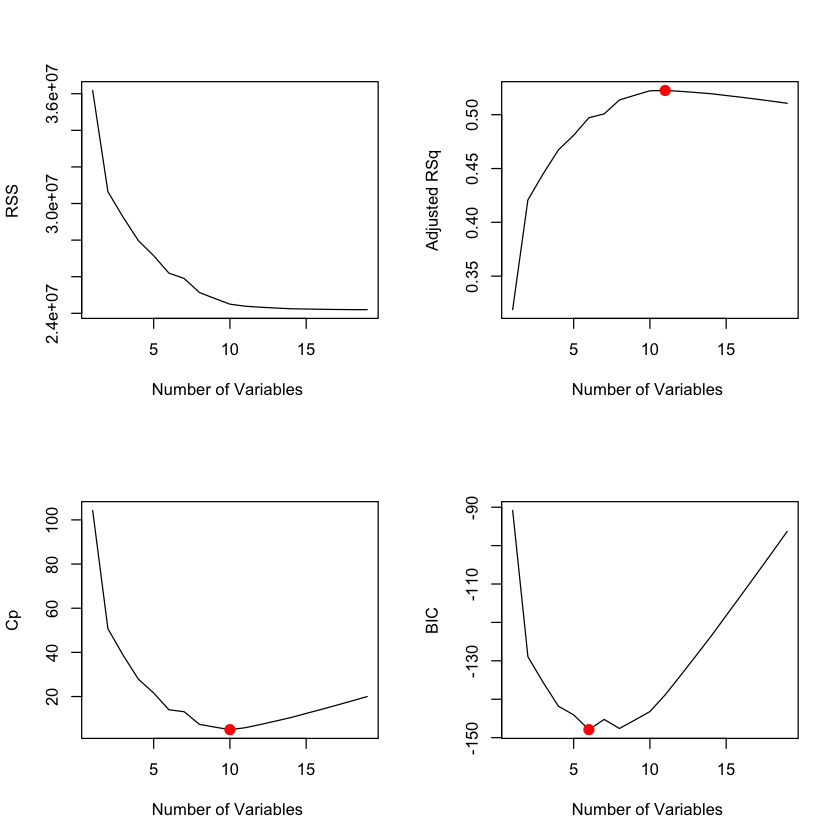

In [17]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="Number of Variables ", ylab="RSS", type="l")

plot(reg.summary$adjr2, xlab="Number of Variables ", ylab="Adjusted RSq", type="l")
points(11, reg.summary$adjr2[11], col="red", cex=2, pch=20)

plot(reg.summary$cp, xlab="Number of Variables ", ylab="Cp", type="l")
points(10, reg.summary$cp[10], col="red", cex=2, pch=20)

plot(reg.summary$bic, xlab="Number of Variables ", ylab="BIC", type="l")
points(6, reg.summary$bic[6], col="red", cex=2, pch=20)

The **regsubsets()** function has a built-in **plot()** command which can be used to display the selected variables for the best model with a given number of predictors, ranked according to the BIC, $C_p$, adjusted $R^2$, or AIC. The top row of each plot contains a black square for each variable selected according to the optimal model associated with that statistic. 

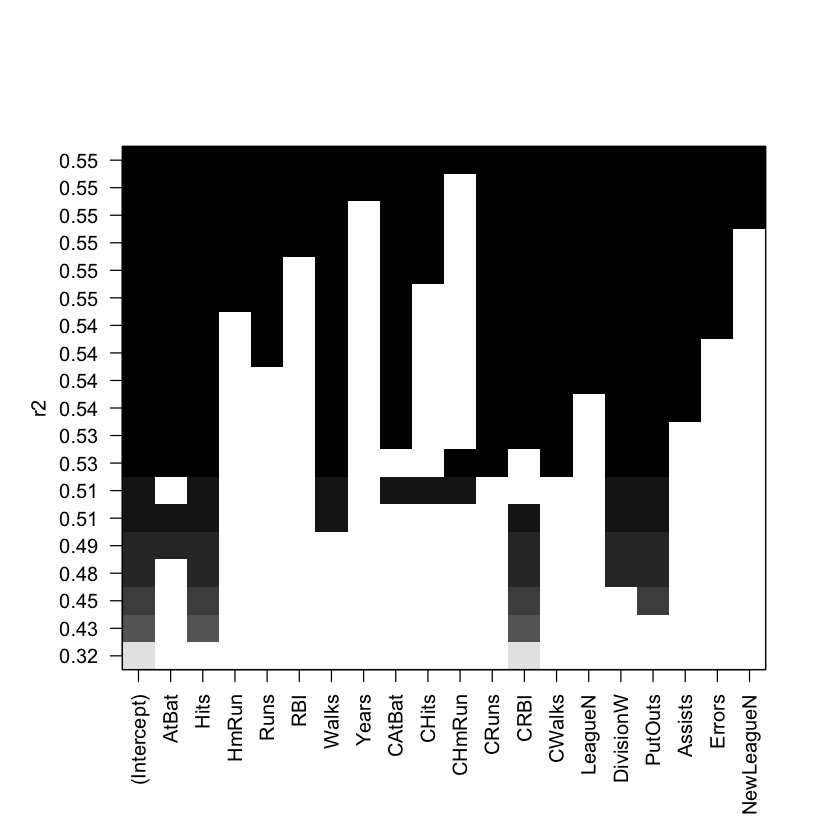

In [18]:
plot(regfit.full,scale="r2")

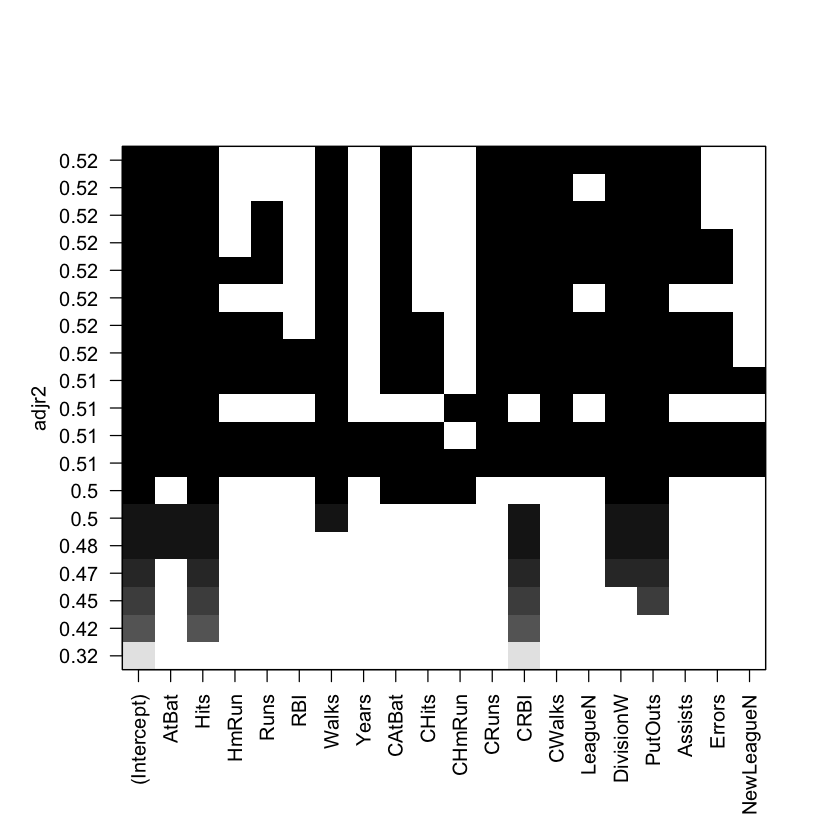

In [19]:
plot(regfit.full,scale="adjr2")

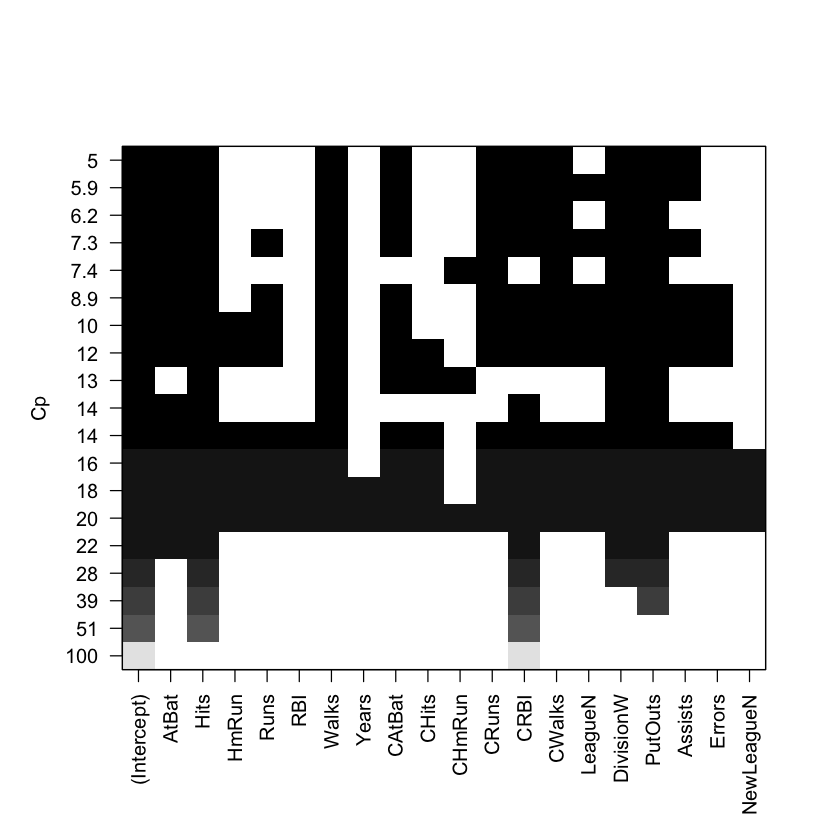

In [20]:
plot(regfit.full,scale="Cp")

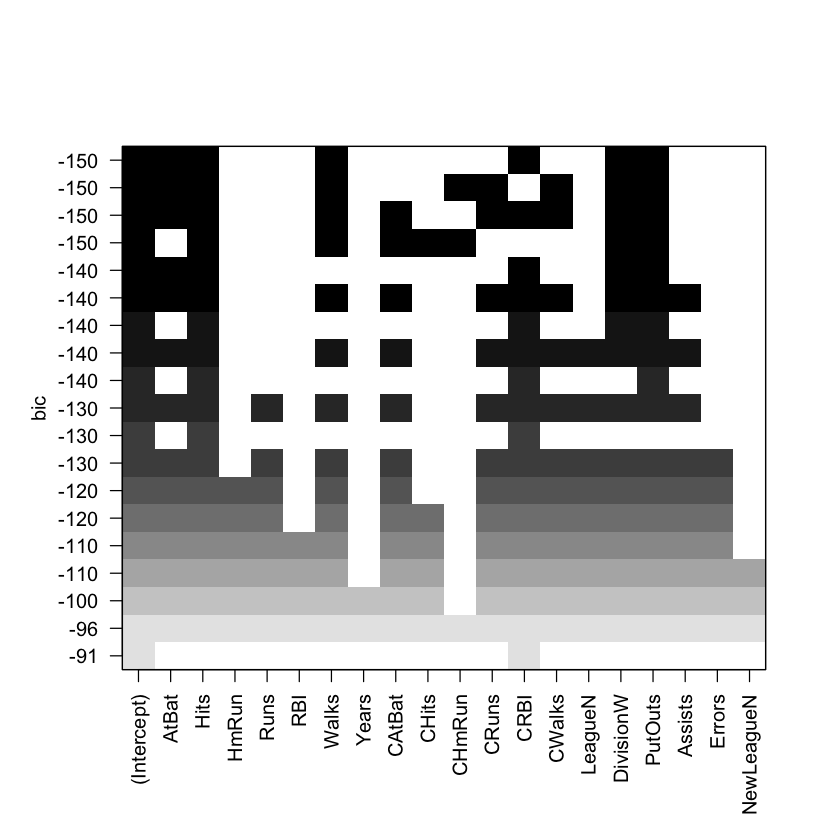

In [21]:
plot(regfit.full,scale="bic")

For instance, we see that several models share a BIC close to −150. However, the model with the lowest BIC is the six-variable model that contains only AtBat, Hits, Walks, CRBI, DivisionW, and PutOuts. We can use the coef() function to see the coefficient estimates associated with this model.

In [22]:
coef(regfit.full ,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

### 6.5.2 Forward and Backward Stepwise Selection
We can also use the **regsubsets()** function to perform forward stepwise or backward stepwise selection, using the argument **method="forward"** or **method="backward"**.

In [24]:
regfit.fwd=regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [25]:
regfit.bwd=regsubsets(Salary~., data=Hitters, nvmax=19, method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


For this data, the best one-variable through six-variable models are each identical for best subset and forward selection. However, the best seven-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selection are different.

In [26]:
coef(regfit.full ,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

In [27]:
coef(regfit.fwd ,7)

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

In [28]:
coef(regfit.bwd ,7)

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

### 6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation
Splitting the observations into a training set and a test set：

In [37]:
set.seed(1)
train=sample(c(TRUE,FALSE), nrow(Hitters), rep=TRUE)
test =(!train)

Apply **regsubsets()** to the training set in order to perform best subset selection:

In [38]:
regfit.best=regsubsets(Salary~., data=Hitters[train,], nvmax =19)

Compute the validation set error for the best model of each model size:

In [39]:
test.mat=model.matrix(Salary~., data=Hitters[test,])

The **model.matrix()** function is used in many regression packages for building an “X” matrix from data. Now we run a loop, and for each size i, we extract the coefficients from regfit.best for the best model of that size, multiply them into the appropriate columns of the test model matrix to form the predictions, and compute the test MSE.

In [31]:
val.errors=rep(NA,19)
for(i in 1:19) {
    coefi=coef(regfit.best,id=i)
    pred=test.mat[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}

In [32]:
val.errors

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

We find that the best model is the one that contains ten variables.

In [33]:
which.min(val.errors)

[1] 10

In [34]:
coef(regfit.best ,10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

We can capture our steps above and write our own predict method.

In [35]:
predict.regsubsets=function(object, newdata, id,...) {
    form=as.formula(object$call[[2]])
    mat=model.matrix(form, newdata)
    coefi=coef(object, id=id)
    xvars=names(coefi)
    mat[,xvars]%*%coefi
}

Finally, we perform best subset selection on the full data set, and select the best ten-variable model.

In [36]:
regfit.best=regsubsets(Salary~.,data=Hitters ,nvmax=19)
coef(regfit.best, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

We now try to choose among the models of different sizes using cross-validation. First, we create a vector that allocates each observation to one of k = 10 folds, and we create a matrix in which we will store the results.

In [40]:
k=10
set.seed(1)
folds=sample(1:k, nrow(Hitters), replace=TRUE)
cv.errors=matrix(NA, k, 19, dimnames=list(NULL, paste(1:19)))

We make our predictions for each model size (using our new predict() method), compute the test errors on the appropriate subset, and store them in the appropriate slot in the matrix cv.errors.

In [41]:
for(j in 1:k) {
    best.fit=regsubsets(Salary~., data=Hitters[folds !=j, ], nvmax =19)
    for(i in 1:19){
        pred=predict(best.fit, Hitters[folds==j,],id=i)
        cv.errors[j,i]=mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

This has given us a 10×19 matrix, of which the (i, j)th element corresponds to the test MSE for the ith cross-validation fold for the best j-variable model. We use the apply() function to average over the columns of this matrix in order to obtain a vector for which the jth element is the cross-validation error for the j-variable model.

In [42]:
mean.cv.errors=apply(cv.errors, 2, mean)
mean.cv.errors

1        2        3        4        5        6        7        8 
160093.5 140196.8 153117.0 151159.3 146841.3 138302.6 144346.2 130207.7 
       9       10       11       12       13       14       15       16 
129459.6 125334.7 125153.8 128273.5 133461.0 133974.6 131825.7 131882.8 
      17       18       19 
132750.9 133096.2 132804.7

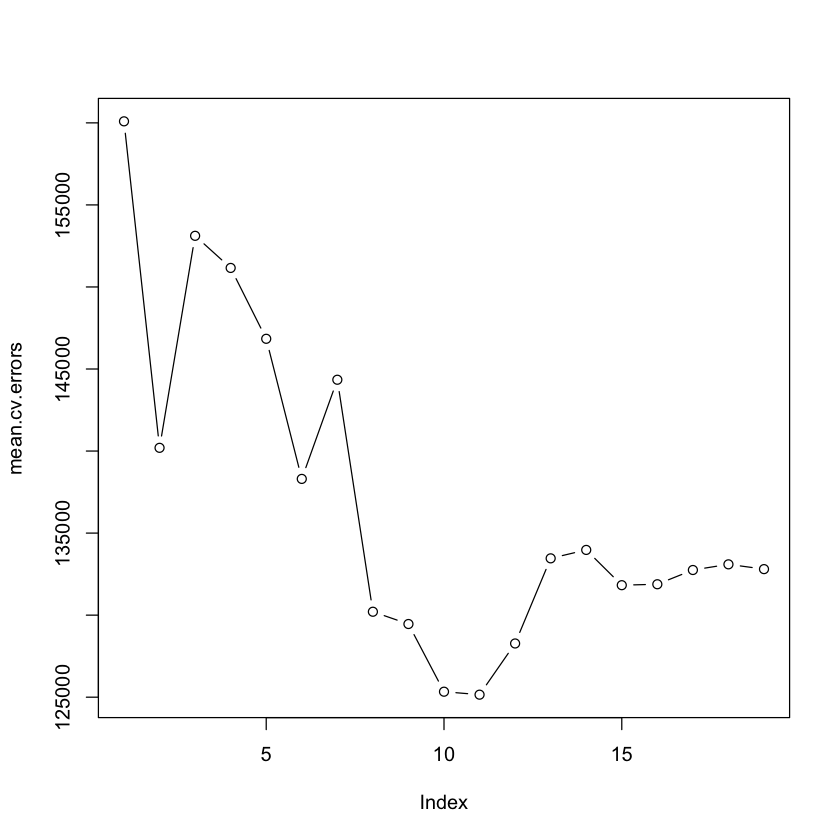

In [43]:
par(mfrow=c(1,1))
plot(mean.cv.errors, type="b")

We see that cross-validation selects an 11-variable model. We now perform best subset selection on the full data set in order to obtain the 11-variable model.

In [44]:
reg.best=regsubsets(Salary~., data=Hitters, nvmax=19)
coef(reg.best, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

## 6.6 Lab 2: Ridge Regression and the Lasso
### 6.6.1 Ridge Regression
The **glmnet()** function has an alpha argument that determines what type of model is fit. If **alpha=0** then a ridge regression model is fit, and if **alpha=1** then a lasso model is fit.

In [46]:
x=model.matrix(Salary~., Hitters)[,-1]
y=Hitters$Salary

Here we have chosen to implement the function over a grid of values ranging from $\lambda=10^{10}$ to $\lambda=10^{−2}$:

In [47]:
library(glmnet)
grid=10^seq(10, -2, length=100)
ridge.mod=glmnet(x, y, alpha=0, lambda=grid)

Note that by default, the **glmnet()** function standardizes the variables so that they are on the same scale. To turn off this default setting, use the argument **standardize=FALSE**.

Associated with each value of λ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by **coef()**:

In [48]:
dim(coef(ridge.mod))

[1]  20 100

These are the coefficients when λ = 11,498, along with their l2 norm:

In [49]:
ridge.mod$lambda[50]

[1] 11497.57

In [50]:
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [51]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 6.360612

In contrast, here are the coefficients when λ = 705, along with their l2 norm. Note the much larger l2 norm of the coefficients associated with this smaller value of λ.

In [52]:
ridge.mod$lambda[60]

[1] 705.4802

In [53]:
coef(ridge.mod)[,60]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

In [54]:
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 57.11001

We can use the predict() function for a number of purposes. For instance, we can obtain the ridge regression coefficients for a new value of λ, say 50:

In [55]:
predict(ridge.mod,s=50,type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso. We first set a random seed so that the results obtained will be reproducible.

In [56]:
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]

Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using λ = 4. Note the use of the predict() function again. This time we get predictions for a test set, by replacing type="coefficients" with the newx argument.

In [57]:
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid,thresh =1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 101036.8

The test MSE is 101037. Note that if we had instead simply fit a model with just an intercept, we would have predicted each test observation using the mean of the training observations. In that case, we could compute the test set MSE like this:

In [58]:
mean((mean(y[train])-y.test)^2)

[1] 193253.1

We could also get the same result by fitting a ridge regression model with a very large value of λ. Note that 1e10 means $10^{10}$.

In [59]:
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 193253.1

In general, instead of arbitrarily choosing λ = 4, it would be better to use cross-validation to choose the tuning parameter λ. We can do this using the built-in cross-validation function, cv.glmnet(). By default, the function performs ten-fold cross-validation, though this can be changed using the argument nfolds. Note that we set a random seed first so our results will be reproducible, since the choice of the cross-validation folds is random.

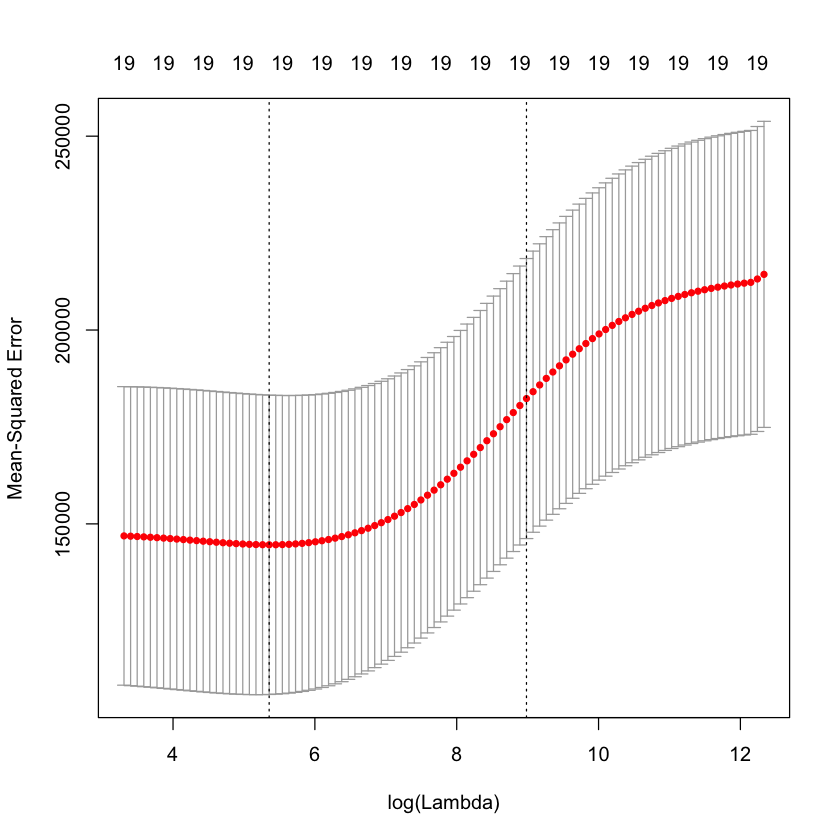

In [61]:
set.seed(1)
cv.out=cv.glmnet(x[train ,],y[train],alpha=0)
plot(cv.out)

In [62]:
bestlam=cv.out$lambda.min
bestlam

[1] 211.7416

In [63]:
ridge.pred=predict(ridge.mod,s=bestlam ,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 96015.51

This represents a further improvement over the test MSE that we got using λ = 4. Finally, we refit our ridge regression model on the full data set, using the value of λ chosen by cross-validation, and examine the coefficient estimates.

In [64]:
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074381   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227535 -91.63411299   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208390

As expected, none of the coefficients are zero—ridge regression does not perform variable selection!

### 6.6.2 The Lasso

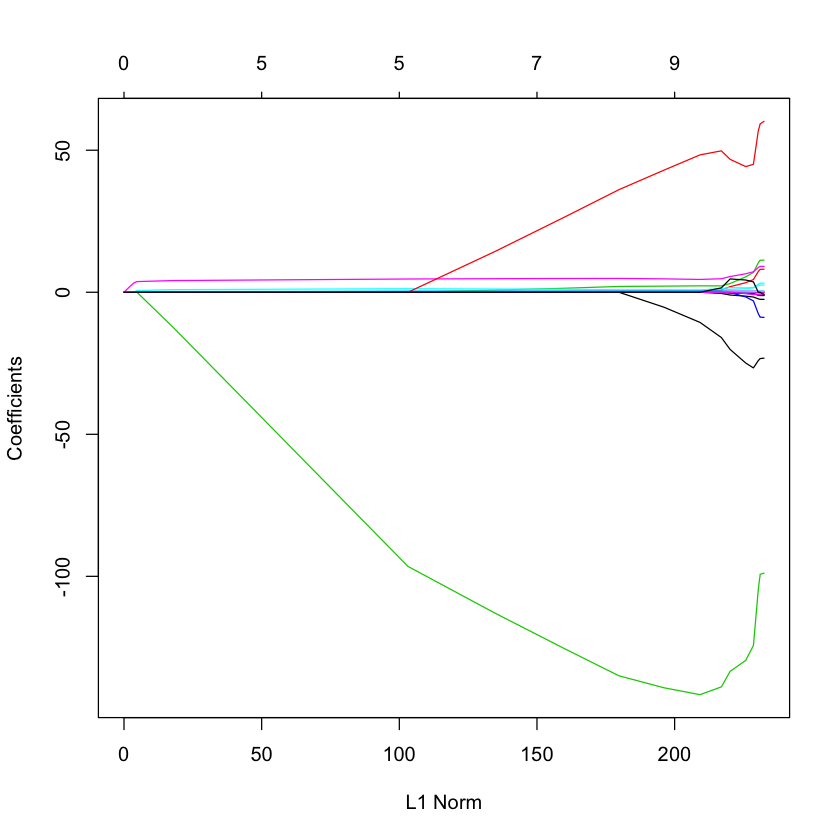

In [65]:
lasso.mod=glmnet(x[train ,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

Some of the coefficients will be exactly equal to zero. We now perform cross-validation and compute the associated test error.

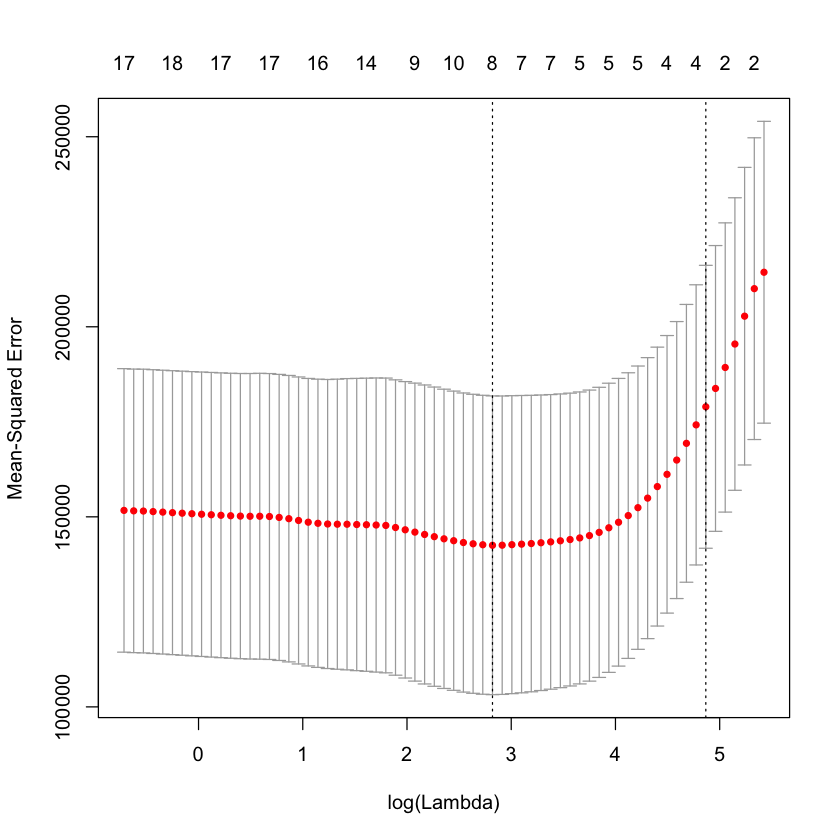

In [66]:
set.seed(1)
cv.out=cv.glmnet(x[train ,],y[train],alpha=1)
plot(cv.out)

In [67]:
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam ,newx=x[test,])
mean((lasso.pred-y.test)^2)

[1] 100743.4

The lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 12 of the 19 coefficient estimates are exactly zero. So the lasso model with λ chosen by cross-validation contains only seven variables.

In [68]:
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
lasso.coef

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000

## 6.7 Lab 3: PCR and PLS Regression
### 6.7.1 Principal Components Regression
Principal components regression (PCR) can be performed using the **pcr()** function, which is part of the **pls** library. We now apply PCR to the **Hitters** data, in order to predict **Salary**.

Setting validation="CV" causes pcr() to compute the ten-fold cross-validation error for each possible value of M , the number of principal components used.

In [69]:
library(pls)
set.seed(2)
pcr.fit=pcr(Salary~., data=Hitters, scale=TRUE, validation="CV")
summary(pcr.fit)


Attaching package: ‘pls’

The following object is masked from ‘package:stats’:

    loadings



Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

One can also plot the cross-validation scores using the **validationplot()** function. Using **val.type="MSEP"** will cause the cross-validation MSE to be plotted.

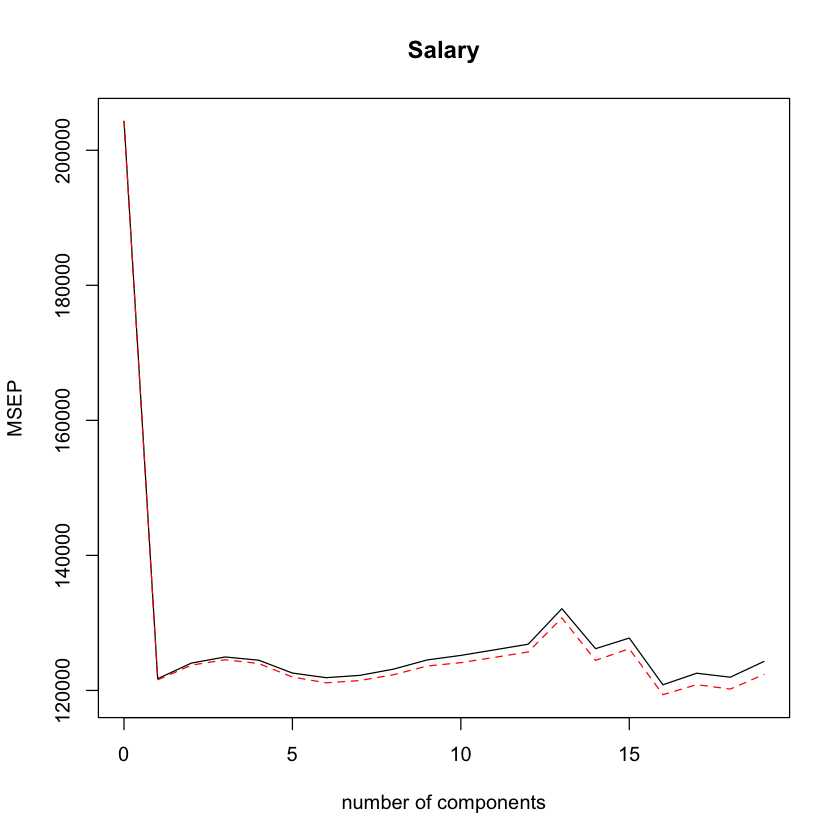

In [70]:
validationplot(pcr.fit,val.type="MSEP")

We see that the smallest cross-validation error occurs when M = 16 components are used.

The **summary()** function also provides the percentage of variance explained in the predictors and in the response using different numbers of components.

We now perform PCR on the training data and evaluate its test set performance.

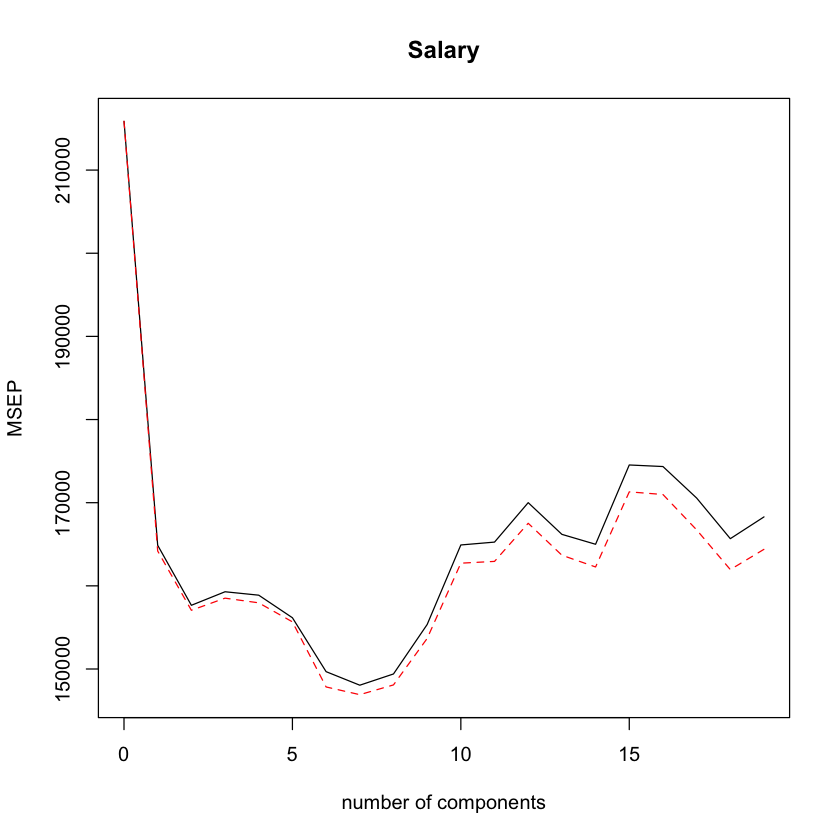

In [71]:
set.seed(1)
pcr.fit=pcr(Salary~., data=Hitters, subset=train, scale=TRUE, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

Now we find that the lowest cross-validation error occurs when M = 7 component are used. We compute the test MSE as follows.

In [72]:
pcr.pred=predict(pcr.fit,x[test,],ncomp=7)
mean((pcr.pred-y.test)^2)

[1] 96556.22

Finally, we fit PCR on the full data set, using M = 7, the number of components identified by cross-validation.

In [73]:
pcr.fit=pcr(y~x, scale=TRUE, ncomp=7)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


### 6.7.2 Partial Least Squares
We implement partial least squares (PLS) using the **plsr()** function, also plsr() in the pls library.

In [74]:
set.seed(1)
pls.fit=plsr(Salary~., data=Hitters, subset=train, scale=TRUE, validation ="CV")
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

The lowest cross-validation error occurs when only M = 2 partial least squares directions are used. We now evaluate the corresponding test set MSE.

In [75]:
pls.pred=predict(pls.fit,x[test,],ncomp=2)
mean((pls.pred-y.test)^2)

[1] 101417.5

Finally, we perform PLS using the full data set, using M = 2, the number of components identified by cross-validation.

In [76]:
pls.fit=plsr(Salary~., data=Hitters, scale=TRUE, ncomp=2)
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40
